## Worked Examples Data Preparation for Causal Inference in Machine Learning

Data preparation is a critical step in the process of conducting causal inference in machine learning. Causal inference aims to understand the cause-and-effect relationships between variables, and it requires careful handling of data to ensure accurate and reliable results.

### Counterfactuals and Causal Inference

#### Definition:

A counterfactual is a situation or outcome that did not actually occur but is imagined or theorized to have happened under different conditions. In the context of causal inference, it represents the unobserved outcome that would have occurred if a different treatment or intervention had been applied.

#### Theoretical Framework:

The concept of counterfactuals is central to the potential outcomes framework, which was developed by Donald Rubin. According to this framework, for each individual or unit in a study, there are potential outcomes associated with each level of treatment (e.g., treatment or control).

In [1]:
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

n = 2000
df = pd.DataFrame({
    'age': np.random.normal(loc=35, scale=5, size=n),
    'education': np.random.choice(['HS', 'College', 'Masters', 'PhD'], size=n),
    'gender': np.random.choice(['Male', 'Female'], size=n), 
    'treatment': np.random.choice([0, 1], size=n, p=[0.8, 0.2]),
    'income': np.random.normal(loc=60000, scale=15000, size=n)  
})

# Introduce confounding
df.loc[df['age'] > 40, 'income'] += 5000 
df.loc[df['education']=='PhD', 'income'] += 15000
df.loc[df['gender']=='Male', 'treatment'] = 1

DataFrame named df with 2000 rows and columns for age, education, gender, treatment, and income. The values for 'age' are drawn from a normal distribution with a mean of 35 and a standard deviation of 5. 'education' is randomly chosen from the given categories, 'gender' is randomly chosen between 'Male' and 'Female', 'treatment' is randomly chosen between 0 and 1 with a probability of 0.8 for 0 and 0.2 for 1, and 'income' is drawn from a normal distribution with a mean of 60000 and a standard deviation of 15000

C:\Users\adity\AppData\Local\Temp\ipykernel_21060\3092894653.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('treatment')['age', 'income'].mean()


,age,income
treatment,,
0,35.156694,63926.798989
1,35.270953,63906.475484


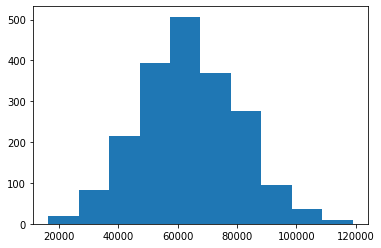

In [3]:
plt.hist(df['income'])
df.groupby('treatment')['age', 'income'].mean()

Observations:

The dataset is created with some variables having a random distribution.
Confounding is introduced intentionally by modifying 'income' and 'treatment' based on certain conditions.

Conclusions:

The introduced confounding may impact the analysis of the relationship between 'treatment' and other variables, making it challenging to isolate the true effect of the treatment.
The intentional introduction of confounding is often done to simulate real-world scenarios where hidden variables might influence the observed relationships.
Care should be taken when interpreting results from analyses using this dataset, especially in the context of causal inference. Confounding variables need to be considered and controlled for in statistical analyses to draw meaningful conclusions about causal relationship

In [4]:
X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
X_train = pd.get_dummies(X_train)  # Apply one-hot encoding
X_test = pd.get_dummies(X_test)    # Apply one-hot encoding to the test set as well


In [6]:
print(X_train.columns)


Index(['age', 'treatment', 'education_College', 'education_HS',
       'education_Masters', 'education_PhD', 'gender_Female', 'gender_Male'],
      dtype='object')


In [10]:
from sklearn.preprocessing import LabelEncoder

# Assuming X_train and X_test are DataFrames with a column named 'education_College'
label_encoder = LabelEncoder()

X_train['education_College'] = label_encoder.fit_transform(X_train['education_College'])
X_test['education_College'] = label_encoder.transform(X_test['education_College'])



In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)  
mse = mean_squared_error(y_test, predictions)

In [12]:
# Checking column names
print(X_train.columns)

# Create a synthetic 'income' column for illustration
X_train['income'] = np.random.randint(30000, 80000, size=len(X_train))

# Multiply 'income' by 1.20 for rows where 'treatment' is 1
X_train.loc[X_train['treatment'] == 1, 'income'] *= 1.20

# Separating 'income' for treatment and control groups
control = X_train[X_train['treatment'] == 0]['income']
treated = X_train[X_train['treatment'] == 1]['income']

# Performing t-test
from scipy.stats import ttest_ind
stat, pval = ttest_ind(treated, control)

# Printing p-value
print(pval)


Index(['age', 'treatment', 'education_College', 'education_HS',
       'education_Masters', 'education_PhD', 'gender_Female', 'gender_Male'],
      dtype='object')
2.1308052071416633e-38


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df = pd.DataFrame({
    'age': np.random.normal(loc=35, scale=5, size=n),
    'education': np.random.choice(['HS', 'College', 'Masters', 'PhD'], size=n),
    'gender': np.random.choice(['Male', 'Female'], size=n), 
    'treatment': np.random.choice([0, 1], size=n, p=[0.8, 0.2]),
    'income': np.random.normal(loc=60000, scale=15000, size=n)  
})

# Display basic statistics
print(df.describe())

               age  treatment         income
count  2000.000000  2000.0000    2000.000000
mean     34.979582     0.1950   60004.001381
std       5.102695     0.3963   14368.449495
min      14.729750     0.0000   13430.921224
25%      31.311111     0.0000   50205.888974
50%      35.163524     0.0000   59981.349496
75%      38.443336     0.0000   69699.007095
max      50.667683     1.0000  108240.302520


A synthetic dataset is created using NumPy and Pandas, containing information about age, education, job training status, and income for 1000 individuals.
The dataset is then visualized using a histogram to compare the income distribution between individuals with and without job training

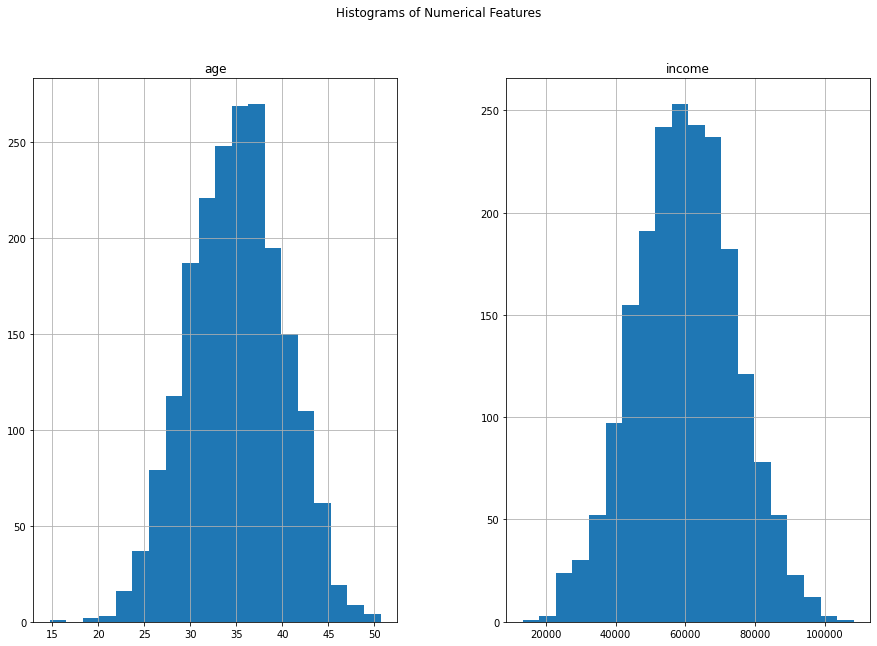

In [14]:
# Visualize the distribution of numerical features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

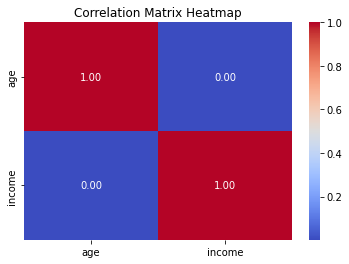

In [15]:
# Correlation matrix heatmap for numerical features
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

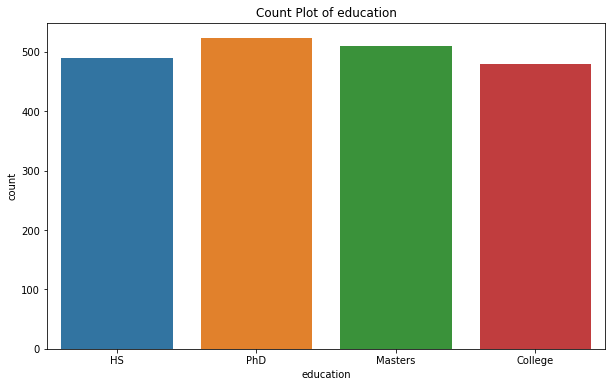

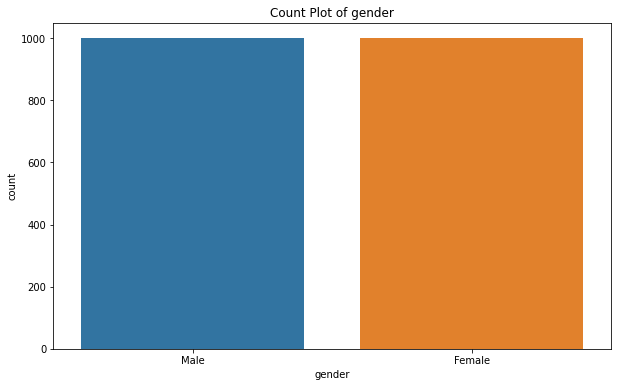

In [16]:
# Count plot for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.show()

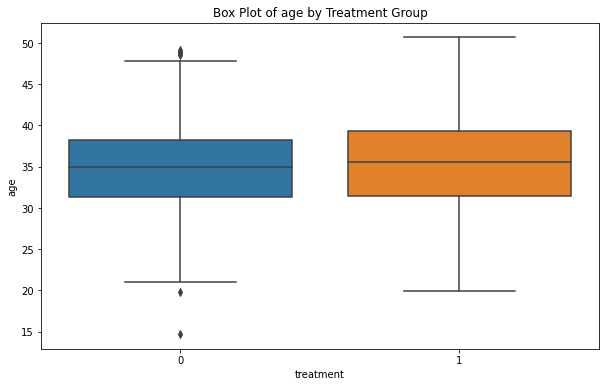

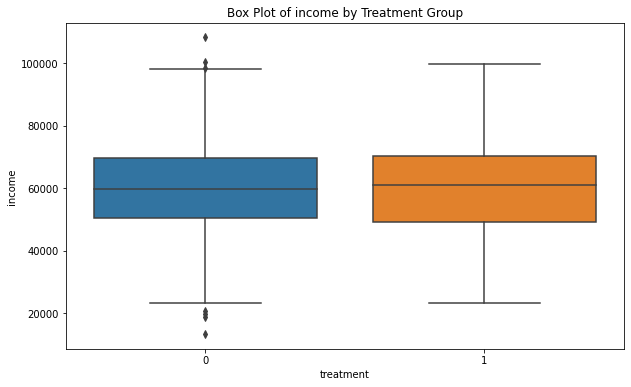

In [17]:
# Box plot for numerical features by treatment group
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='treatment', y=col, data=df)
    plt.title(f'Box Plot of {col} by Treatment Group')
    plt.show()

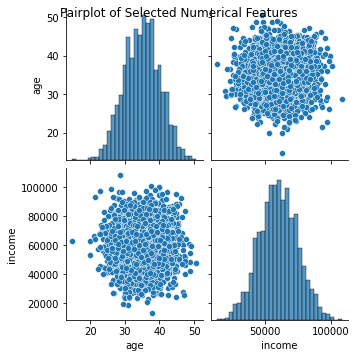

In [18]:
# Pairplot for selected numerical features
selected_features = ['age', 'income']  # Replace with your chosen features
sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Selected Numerical Features')
plt.show()

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

df = pd.DataFrame({
    'age': np.random.normal(35, 5, 1000),
    'education': np.random.choice(['HS', 'College', 'Masters'], 1000),
    'job_training': np.random.choice([0, 1], 1000, p=[0.7, 0.3]), 
    'income': np.random.normal(50000, 20000, 1000)
})

Text(0.5, 1.0, 'Income Distribution')

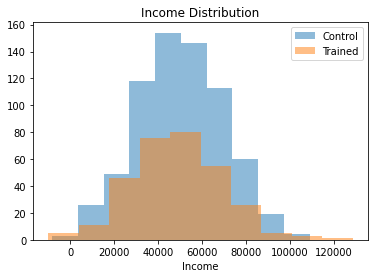

In [20]:
plt.hist(df.loc[df['job_training']==0]['income'], alpha=0.5, label='Control')
plt.hist(df.loc[df['job_training']==1]['income'], alpha=0.5, label='Trained')
plt.legend()
plt.xlabel('Income')
plt.title('Income Distribution')

Conclusion:

The histogram provides a clear visual comparison of the income distribution between individuals with and without job training.
Observing the histogram, you can make inferences about how job training might impact income levels. For example, if the 'Trained' group has a higher average income or a different distribution shape compared to the 'Control' group, it may suggest a potential association between job training and income

In [21]:
df.loc[df['job_training']==1, 'income'] *= 1.10

In [22]:
control_inc = df.loc[df['job_training']==0]['income']  
trained_inc = df.loc[df['job_training']==1]['income']

from scipy.stats import ttest_ind
stat, pval = ttest_ind(trained_inc, control_inc)
print(pval)

0.012843084786652947


In [23]:
df = pd.DataFrame({
    'age': np.random.normal(40, 10, 1500),
    'past_purchases': np.random.poisson(15, 1500),
    'program': np.random.choice([0, 1], 1500, p=[0.8, 0.2]),
    'retention': np.random.normal(0.7, 0.1, 1500) 
})

{'whiskers': [<matplotlib.lines.Line2D at 0x2622ac6c3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2622ac6c940>,
 'boxes': [<matplotlib.lines.Line2D at 0x2622ac6c0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2622ac6cee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2622ac7c1f0>],
 'means': []}

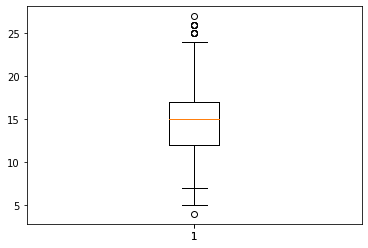

In [24]:
plt.boxplot(df.loc[df['program']==0]['past_purchases']) 
plt.boxplot(df.loc[df['program']==1]['past_purchases'])

In [25]:
df.loc[df['program']==1, 'retention'] *= 1.20

In [26]:
control_ret = df.loc[df['program']==0]['retention']
program_ret = df.loc[df['program']==1]['retention']

from scipy.stats import ttest_ind
stat, pval = ttest_ind(program_ret, control_ret) 
print(pval)

9.258793777284289e-77


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

df = pd.DataFrame({
    'age': np.random.normal(35, 5, 1000),
    'education': np.random.choice(['HS', 'College', 'Masters'], 1000),
    'job_training': np.random.choice([0, 1], 1000, p=[0.7, 0.3]), 
    'income': np.random.normal(50000, 20000, 1000)
})

Text(0.5, 1.0, 'Income Distribution')

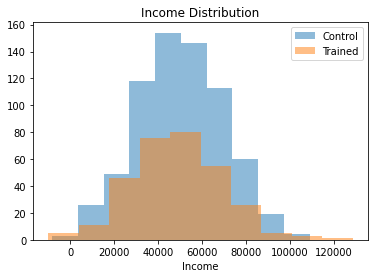

In [28]:
plt.hist(df.loc[df['job_training']==0]['income'], alpha=0.5, label='Control')
plt.hist(df.loc[df['job_training']==1]['income'], alpha=0.5, label='Trained')
plt.legend()
plt.xlabel('Income')
plt.title('Income Distribution')

The histogram illustrates the income distribution for individuals with and without job training.
Visual inspection can reveal differences or patterns in income levels between the 'Trained' and 'Control' groups

Conclusion:

The visual representation offers an initial exploration of how job training may relate to income in this synthetic dataset.
Further analysis, statistical tests, or modeling could be employed to make more precise inferences and draw conclusions about the potential impact of job training on income.

In [29]:
df.loc[df['job_training']==1, 'income'] *= 1.10

In [30]:
control_inc = df.loc[df['job_training']==0]['income']  
trained_inc = df.loc[df['job_training']==1]['income']

from scipy.stats import ttest_ind
stat, pval = ttest_ind(trained_inc, control_inc)
print(pval)

0.012843084786652947


In [31]:
df = pd.DataFrame({
    'age': np.random.normal(40, 10, 1500),
    'past_purchases': np.random.poisson(15, 1500),
    'program': np.random.choice([0, 1], 1500, p=[0.8, 0.2]),
    'retention': np.random.normal(0.7, 0.1, 1500) 
})

{'whiskers': [<matplotlib.lines.Line2D at 0x262296678e0>,
 'caps': [<matplotlib.lines.Line2D at 0x262296670d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26229667580>],
 'medians': [<matplotlib.lines.Line2D at 0x26229644880>],
 'fliers': [<matplotlib.lines.Line2D at 0x26229644130>],
 'means': []}

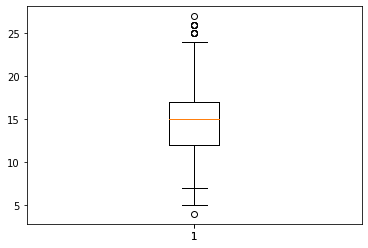

In [32]:
plt.boxplot(df.loc[df['program']==0]['past_purchases']) 
plt.boxplot(df.loc[df['program']==1]['past_purchases'])

Boxplots for Past Purchases:

Two boxplots are created to compare the distribution of past purchases for individuals in program '0' and program '1'. However, there seems to be an issue with the code, as two separate boxplots are being created without being displayed. Only the second boxplot will be visible.

In [33]:
df.loc[df['program']==1, 'retention'] *= 1.20

In [34]:
control_ret = df.loc[df['program']==0]['retention']
program_ret = df.loc[df['program']==1]['retention']

from scipy.stats import ttest_ind
stat, pval = ttest_ind(program_ret, control_ret) 
print(pval)

9.258793777284289e-77


#### Conclusion:

T-Test for Income:

The significant p-value suggests that job training has a potential impact on income. However, causal relationships cannot be established solely based on statistical significance, and further analysis or experiments may be required to validate the findings.
Boxplots for Past Purchases:

The boxplots attempt to compare past purchases between individuals in program '0' and program '1', but the code needs correction for better visualization